## Introduction

This time we aims to develop model for breast cancer classification using an Artificial Neural Network (ANN) based on the Wisconsin Breast Cancer dataset.

The model will classify tumors as 2 = benign, 4 = malignant. There are 11 columns and 683 rows data.

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('Data.csv')

## Check the Data

In [3]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [5]:
dataset.isnull().sum()

,0
Sample code number,0
Clump Thickness,0
Uniformity of Cell Size,0
Uniformity of Cell Shape,0
Marginal Adhesion,0
Single Epithelial Cell Size,0
Bare Nuclei,0
Bland Chromatin,0
Normal Nucleoli,0
Mitoses,0


## Transform Data

In [6]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [7]:
y = np.where(y == 2, 0, 1)

## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state=11)

##Feature Scaling the Dataset

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building ANN Model

In [10]:
ann = tf.keras.models.Sequential()

### Adding first hidden layer

In [11]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

### Adding second hidden layer

In [12]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

### Adding output layer

In [13]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

## Compile the ANN Model

In [14]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

## Training the ANN Model

In [15]:
ann.fit(X_train, y_train, batch_size=32 , epochs= 100)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1076 - loss: 0.7738
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2668 - loss: 0.7041
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5978 - loss: 0.6490
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7442 - loss: 0.6170
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8863 - loss: 0.5848
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9405 - loss: 0.5489
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9486 - loss: 0.5229 
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9670 - loss: 0.4933 
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9623 - loss: 0.4720 
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9581 - loss: 0.4700 
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9649 - loss: 0.4572 
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accu

## Evaluating the Model with Confusion Matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
accuracy of model : 98.54%


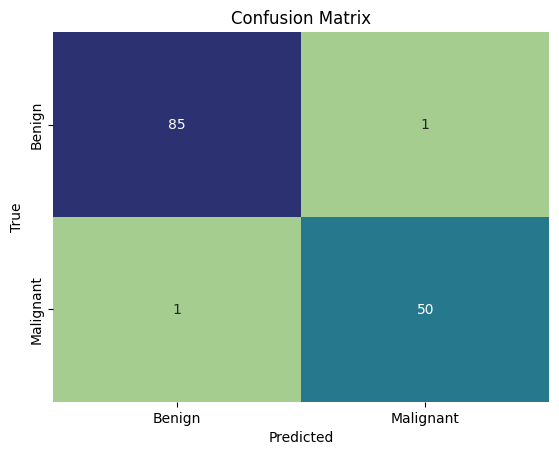

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy of model : {:.2f}%'.format(accuracy * 100))

sns.heatmap(cm, annot=True, cmap="crest", cbar=False, xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
